In [2]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten

### Pokémon Sightings: Hierarchical Clustering

In [4]:
# X-Coordinates
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]

# Y-Coordinates
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

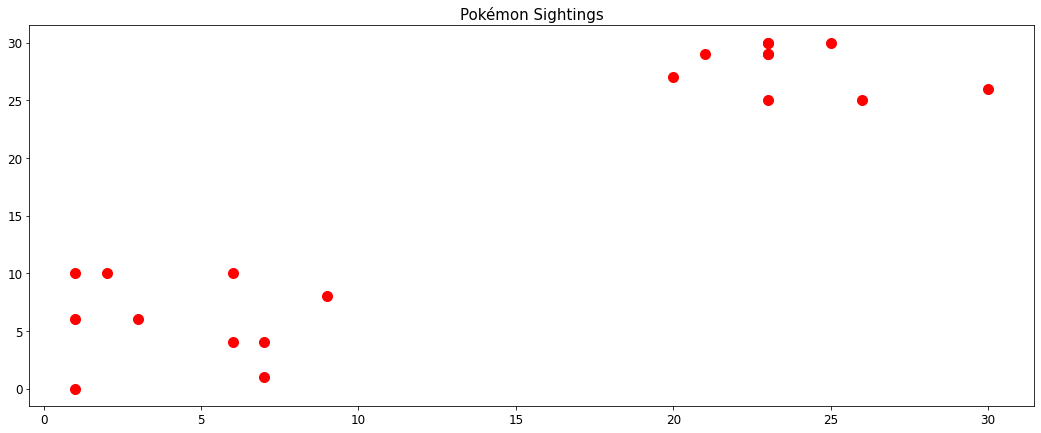

In [5]:
# Create a scatter plot
plt.figure(figsize = (18, 7))
plt.scatter(x, y, color = "red", s = 100)
plt.title("Pokémon Sightings", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [6]:
df = pd.DataFrame({"x": x, "y": y})

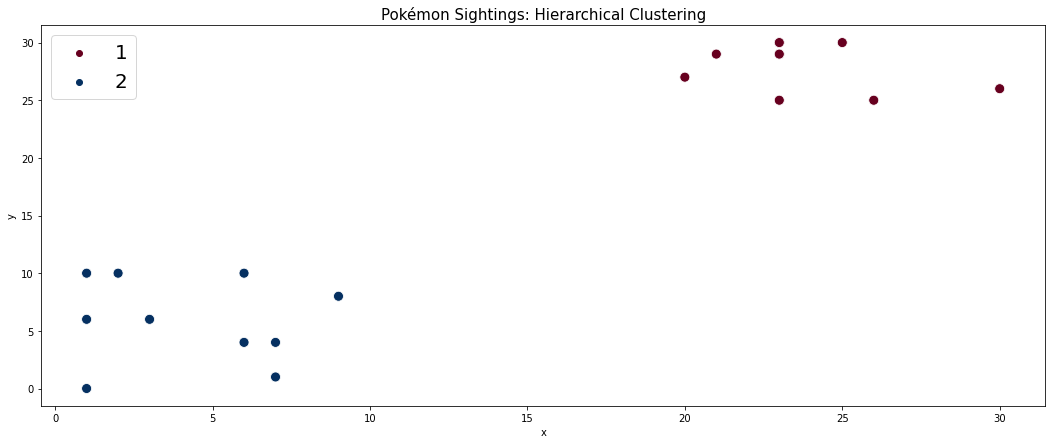

In [7]:
# Use the linkage() function to compute distance
Z = linkage(df, "ward")

# Generate cluster labels
df["cluster_labels"] = fcluster(Z, 2, criterion = "maxclust")

# Plot the points with seaborn
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "x",
                y = "y",
                hue = "cluster_labels",
                data = df,
                s = 100,
                palette = "RdBu")
plt.title("Pokémon Sightings: Hierarchical Clustering", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.show()

### Pokémon Sightings: K-Means Clustering

In [8]:
# X-Coordinates
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]

# Y-Coordinates
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# DataFrame
df = pd.DataFrame({"x": x, "y": y}).astype("float")

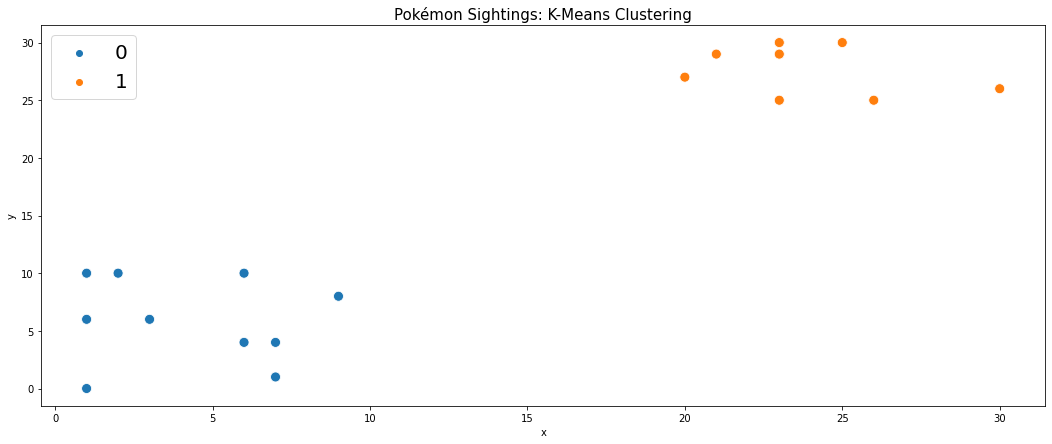

In [9]:
# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
plt.figure(figsize = (18, 7))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df, s = 100)
plt.legend(loc = 2, prop={'size': 20})
plt.title("Pokémon Sightings: K-Means Clustering", size = 15)
plt.show()

### Normalization of Data

In [39]:
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

# Use the whiten() function to standardize the data
scaled_data = whiten(data)
print(scaled_data)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


**Illustration**

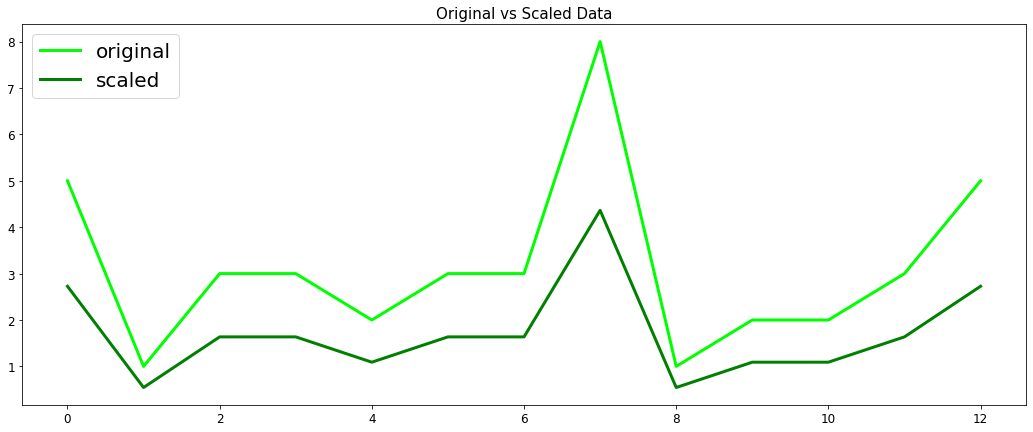

In [40]:
plt.figure(figsize = (18, 7))
plt.plot(data, label = "original", color = "lime", linewidth = 3)
plt.plot(scaled_data, label = "scaled", color = "green", linewidth = 3)
plt.title("Original vs Scaled Data", size = 15)
plt.legend(loc = 2, prop={'size': 20})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Normalization of Goals List Data

In [41]:
# List of goals scored by a football team 
goals = [4, 3, 2, 3, 1, 1, 2, 0, 1, 4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


**Illustration**

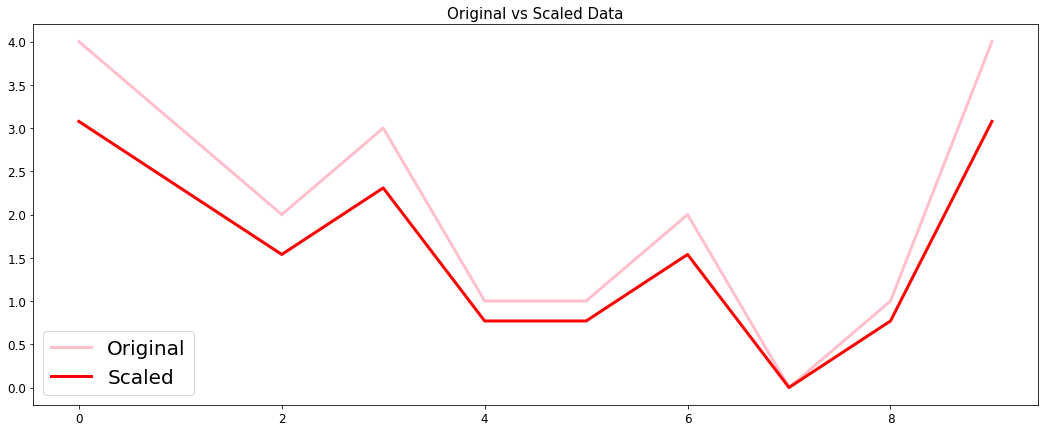

In [42]:
plt.figure(figsize = (18, 7))
plt.plot(goals, label = "Original", color = "pink", linewidth = 3)
plt.plot(scaled_data, label = "Scaled", color = "red", linewidth = 3)
plt.title("Original vs Scaled Data", size = 15)
plt.legend(loc = 3, prop={'size': 20})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### Normalization of Small Numbers

In [43]:
# Prepare data
data = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(data)
print(scaled_data)

[ 1.7948954   0.71795816 -0.35897908 -0.71795816 -0.35897908  1.7948954
 -0.71795816 -1.07693724 -0.71795816  0.35897908]


**Illustration**

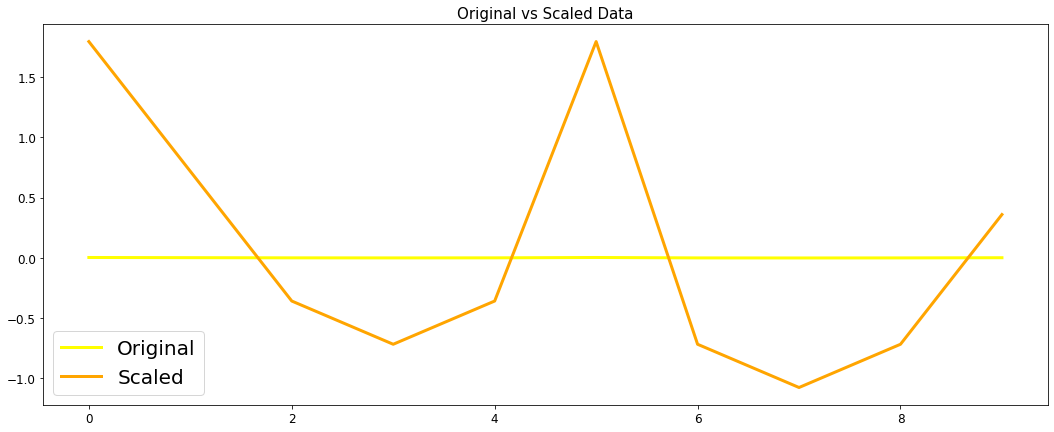

In [44]:
plt.figure(figsize = (18, 7))
plt.plot(data, label = "Original", color = "yellow", linewidth = 3)
plt.plot(scaled_data, label = "Scaled", color = "orange", linewidth = 3)
plt.title("Original vs Scaled Data", size = 15)
plt.legend(loc = 3, prop={'size': 20})
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

### FIFA 18: Normalize data

In [49]:
df = pd.read_csv("fifa_18_sample_data.csv")
df[:3]

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False


In [54]:
# wage of a player in Euros
eur_wage = df["eur_wage"]

# Current transfer value
eur_value = df["eur_value"]

data = pd.DataFrame({"Eur_Wage": eur_wage,
                     "Eur_Value": eur_value})
data[:5]

,Eur_Wage,Eur_Value
0,565000.0,95500000.0
1,565000.0,105000000.0
2,280000.0,123000000.0
3,510000.0,97000000.0
4,230000.0,61000000.0


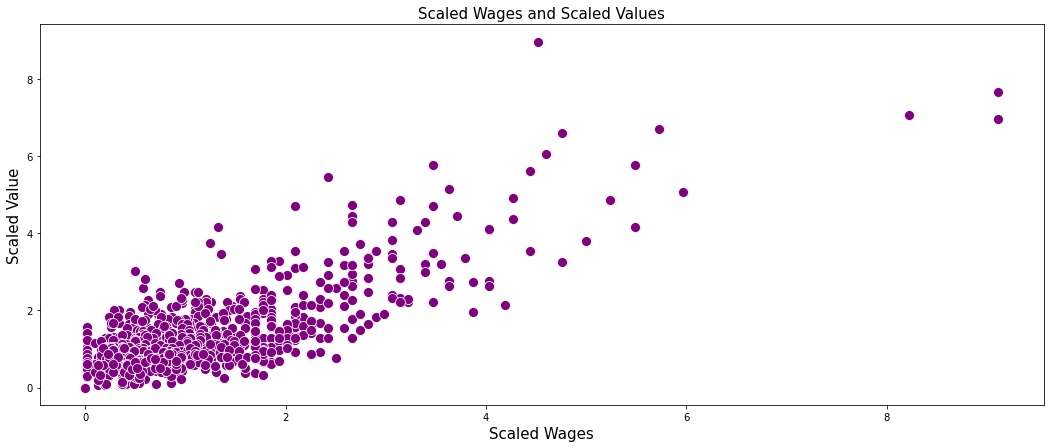

In [69]:
# Scale Wage and Value'
scale_wage = whiten(data["Eur_Wage"])

scale_value = whiten(data["Eur_Value"])

# Plot the two columns in a scatter plot
plt.figure(figsize = (18, 7))
sns.scatterplot(x = scale_wage, y = scale_value, s = 100, color = "purple")
plt.title("Scaled Wages and Scaled Values", size = 15)
plt.xlabel("Scaled Wages", size = 15)
plt.ylabel("Scaled Value", size = 15)
plt.show()

In [68]:
pd.DataFrame({"Scaled_Wage": scale_wage, "Scaled_Value": scale_value}).describe()

,Scaled_Wage,Scaled_Value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064
